In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np
from numpy import load
import scipy
import matplotlib.pyplot as plt
from scipy.special import legendre
from numpy.linalg import svd

from time import time



In [2]:
from joblib import Parallel, delayed

In [3]:
sum=np.zeros((5000,5000))
x = np.linspace(-1,1,5000)
# modefify x to 2d array
x = x[:,np.newaxis]
sum,x

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[-1.        ],
        [-0.99959992],
        [-0.99919984],
        ...,
        [ 0.99919984],
        [ 0.99959992],
        [ 1.        ]]))

In [4]:
np.linalg.norm(x,'fro')
import pandas as pd

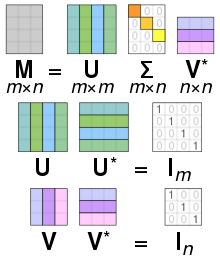

In [5]:
x = np.linspace(-1,1,5000)
# data frame label 12 columns 12 rows by number of x
df = pd.DataFrame(index=range(1,13), columns=range(1,13))
for i in range(0,12):
    for j in range(0,12):
        np.sum(legendre(i)(x)*legendre(j)(x))
        df.iloc[i,j] = np.sum(legendre(i)(x)*legendre(j)(x))
df

,1,2,3,4,5,6,7,8,9,10,11,12
1,5000.0,0.0,1.0002,0.0,1.000667,-0.0,1.0014,-0.0,1.0024,-0.0,1.003667,0.0
2,0.0,1667.333467,-0.0,1.000467,-0.0,1.001067,-0.0,1.001934,-0.0,1.003067,0.0,1.004468
3,1.0002,-0.0,1000.8004,-0.0,1.000867,-0.0,1.0016,-0.0,1.002601,-0.0,1.003867,-0.0
4,0.0,1.000467,-0.0,715.143657,-0.0,1.0014,-0.0,1.002267,-0.0,1.003401,-0.0,1.004801
5,1.000667,-0.0,1.000867,-0.0,556.445778,-0.0,1.002067,0.0,1.003067,-0.0,1.004334,-0.0
6,-0.0,1.001067,-0.0,1.0014,-0.0,455.456546,0.0,1.002867,-0.0,1.004001,-0.0,1.005401
7,1.0014,-0.0,1.0016,-0.0,1.002067,0.0,385.541262,-0.0,1.003801,-0.0,1.005068,-0.0
8,-0.0,1.001934,-0.0,1.002267,0.0,1.002867,-0.0,334.270401,-0.0,1.004868,-0.0,1.006268
9,1.0024,-0.0,1.002601,-0.0,1.003067,-0.0,1.003801,-0.0,295.063624,-0.0,1.006068,-0.0
10,-0.0,1.003067,-0.0,1.003401,-0.0,1.004001,-0.0,1.004868,-0.0,264.111264,-0.0,1.007401


In [6]:
from scipy.special import legendre
from scipy.integrate import quad

def integrand(x, i, j):
    return legendre(i)(x) * legendre(j)(x)

degree_i = 3
degree_j = 1

result, _ = quad(integrand, -1, 1, args=(degree_i, degree_j))
print("Result of integration:", result)


Result of integration: 9.71445146547012e-17


In [26]:
temp2313=np.outer([4,5,6],legendre(1)([1,2,3]))
#norm
temp2313

array([[ 4.,  8., 12.],
       [ 5., 10., 15.],
       [ 6., 12., 18.]])

In [50]:

scale=StandardScaler()

scaled = scale.fit_transform(temp2313)
scaled

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

In [52]:
len(data)

5000

In [30]:
matrix_norm = np.linalg.norm(temp2313, 'fro')#frobenius norm is the square root of the sum of the absolute squares of its elements
np.sum((temp2313/matrix_norm)**2)

1.0

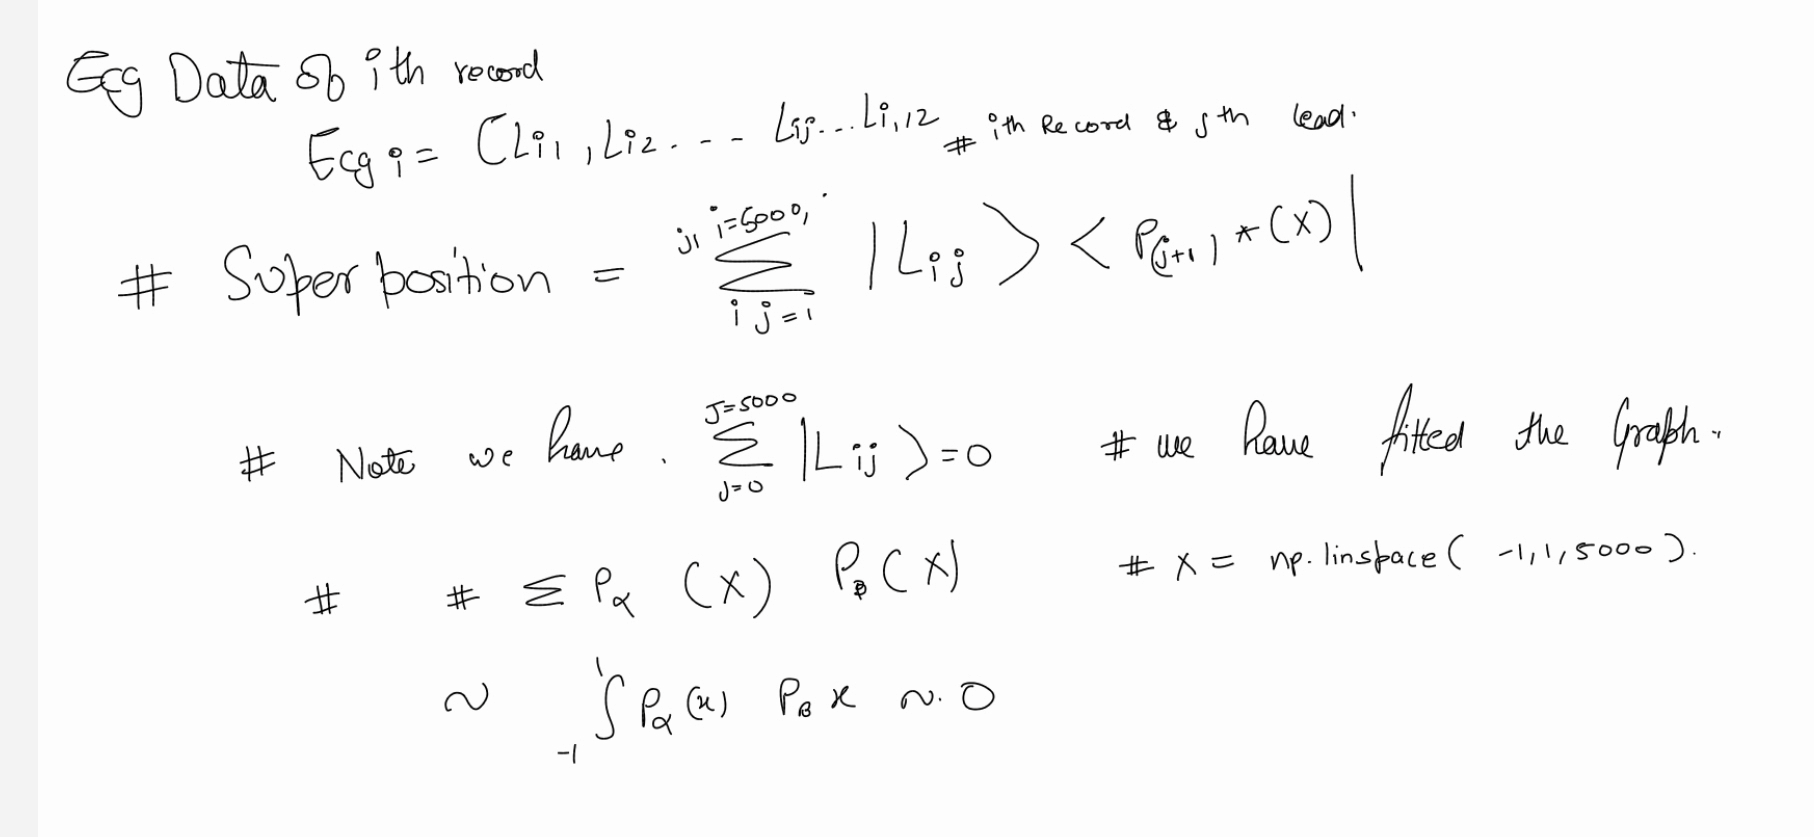

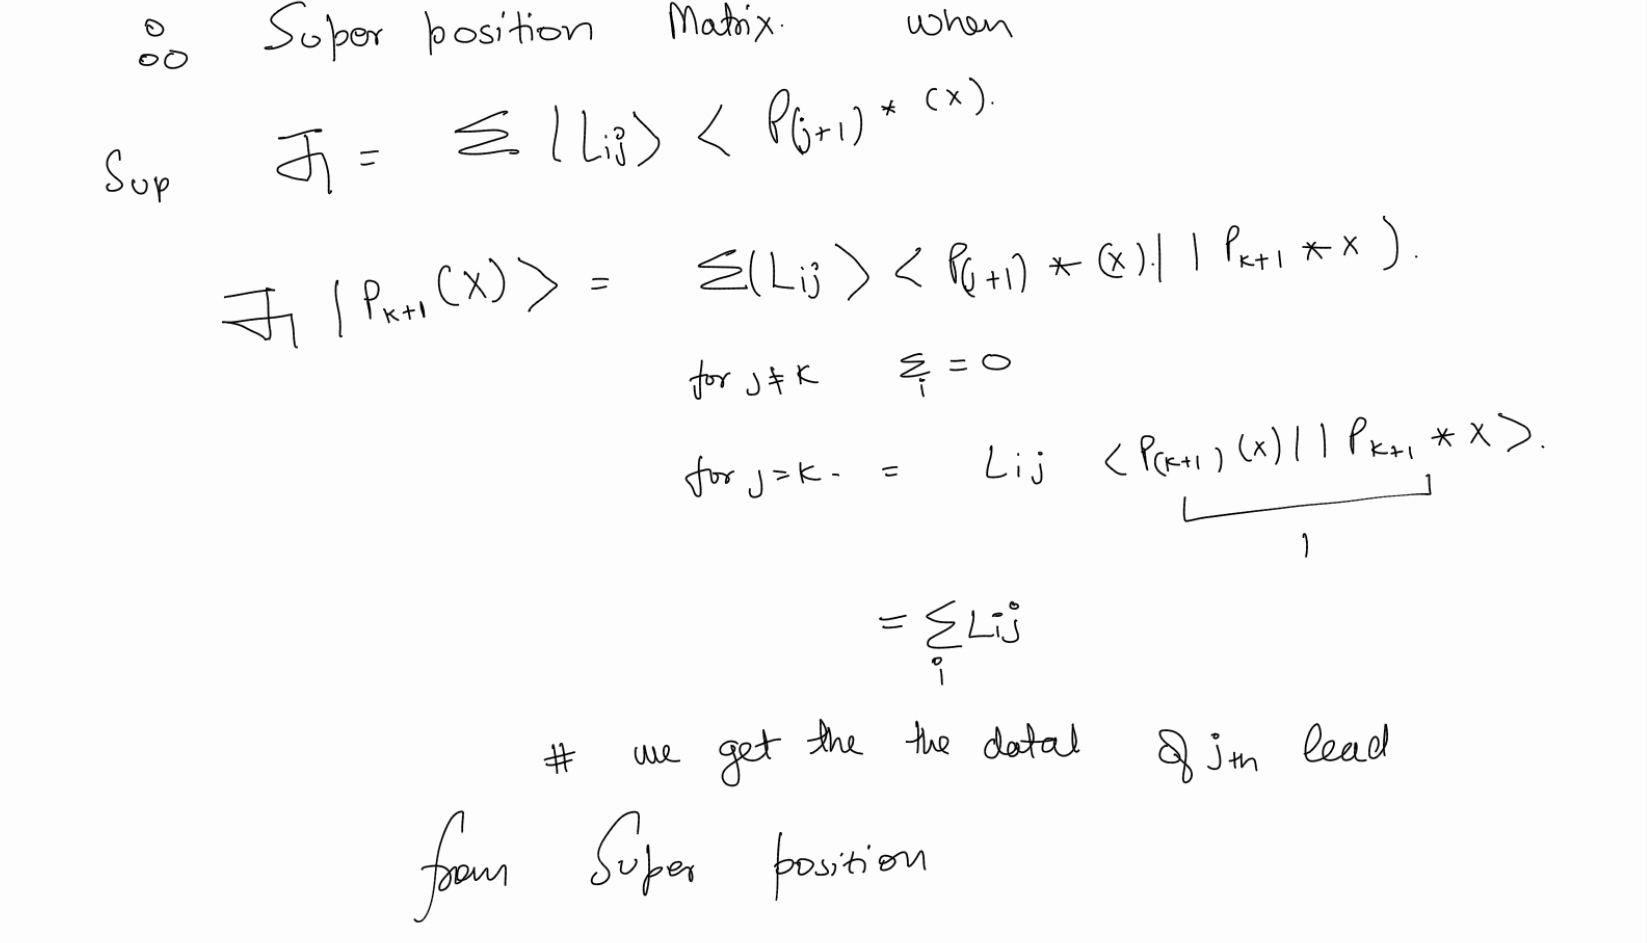

In [24]:
#DEF FUNCTION INPUT SHOULD BE ONLY INT GIVE SQUARE
import math
def superposition(data: np.ndarray):# it will create super position of 12 lead ecg data 
    """
    This function takes a 2D numpy array as input and returns the superposition of the data.
    superpostion matrix multiplied by legendre(j+1)(x) we get the j-th column of the data matrix 
    or we can say the jth lead of the ecg data
    """
    scale=StandardScaler()
    
    scaled = scale.fit_transform(data  )
    sum=np.zeros((5000,5000))
    x = np.linspace(-1,1,5000)
    for i in range(data.shape[1]):
        temp=legendre(i+1)(x)
        norm=math.sqrt(np.sum(temp*temp))
        sum=sum+np.outer(data[:,i],#data is in shaPE OF 5000xDATA.shape[1] AN SHAPE[1] MEANS THE NUMBER OF COLUMNS
                         temp#legendre polinomial of order i+1 apllied to x p_n applies to matrix x
                         )/norm
        #outer product of the i-th column of the data matrix and the i-th legendre polynomial
        
    
    return sum

def singularvaluedecomposition(data):
    data_sup = superposition(data)
    a, data_svd, b = svd(data_sup)

    return data_svd

def normalize_matrix(matrix):#take input as matrix and return the normalized matrix #sum of square of all the elements of the matrix is 1
    matrix_norm = np.linalg.norm(matrix, 'fro')#frobenius norm is the square root of the sum of the absolute squares of its elements
                                                # works for 2d arrays
    if np.isnan(matrix_norm):# is NAN not a number 
        #it will return a matrix of zeros of the same shape as the input matrix
        return np.zeros_like(matrix)
    else:
        normalized_matrix = matrix / matrix_norm
        return normalized_matrix
    
def coarse_grain(data,f):
    """ 
    This function takes a 2D numpy array and an integer f as input and returns the coarse grained image of the data.
    which means that the data is divided into fxf blocks and the mean of each block is calculated and stored in a new matrix.
    or we can say we reduce the resolution of the image by a factor of f"""
    img = superposition(data)#superposition of the data

    s1=np.zeros((int(img.shape[0]/f)#shape[0] is the number of rows
                 ,int(img.shape[1]/f))#shape[1] is the number of columns
                 ) # Coarse grained image'

    for i in range(s1.shape[0]):# s1 is zero matrix of shape[0] rows and shape[1] columns
        for j in range(s1.shape[1]):
            s1[i,j]=np.mean(img[i*f:i*f+f,j*f:j*f+f]) # changing the value of the s1 zero matrix to the mean of the fxf block of the img matrix

    return s1

In [9]:
import os
os.getcwd()
# go one directory back
os.chdir("..")
os.getcwd()

'/home/karansingh/Documents/summer-term/KARAN_ECG'

In [17]:
data = load('data_prep/disease_SR.npy')
cc = coarse_grain(data[0],50)
data.shape

(5000, 5000, 12)

In [57]:
data = load('data_prep/disease_SR.npy')
cc = superposition(data[0])
data[0]

array([[-0.02 ,  0.   ,  0.02 , ...,  0.   , -0.02 , -0.044],
       [-0.02 ,  0.01 ,  0.029, ...,  0.005, -0.02 , -0.044],
       [-0.024, -0.005,  0.02 , ...,  0.   , -0.015, -0.039],
       ...,
       [ 0.078,  0.078,  0.   , ...,  0.068,  0.078,  0.102],
       [ 0.098,  0.088, -0.01 , ...,  0.059,  0.063,  0.098],
       [ 0.088,  0.107,  0.02 , ...,  0.044,  0.063,  0.088]])

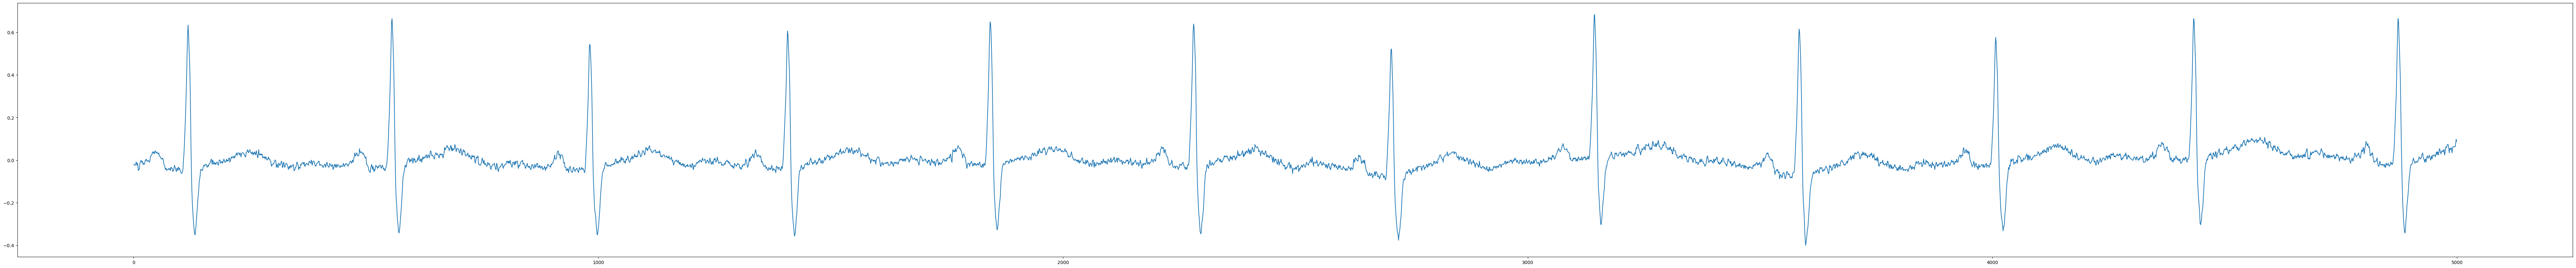

In [11]:
# graph data[0] x axis is index/10000 and y axis is the value of the data size 5000
plt.figure(figsize=(100,10))
plt.plot(data[0,:,0])
plt.show()


In [12]:
###### back
data.shape,cc.shape,data[0].shape

((5000, 5000, 12), (100, 100), (5000, 12))

In [13]:
np.savetxt('junk.txt',cc)


In [22]:
data_split[0].shape,len(data_split[0])

((500, 5000, 12), 500)

184

In [14]:
############################################################
    
#### SR_data

data = load('data_prep/disease_SR.npy')

split_number = 10
if len(data)%split_number == 0:# to split data in the 10 parts
    data_split = np.array_split(data,split_number)# numpy array of (5000, 5000, 12)
    ### data got splitted in (500, 5000, 12) each






for i in range(split_number):
    cc = data_split[i] #each 500 data

    norm_matrix = []

    for j in range(len(cc)):# cc[j] give j th report consist of 5000x12 matrix
        
        norm_matrix.append(normalize_matrix(cc[j]))
        """ 
        norm matrix is a list of normalised 5000x12 matrices of 500 reports from cc
        # len is 500
        """

        

    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs = -1)(delayed(coarse_grain)(x,50) for x in cc)
    end = time()

    print(end- start)

    results = np.array(results)
    cc = []
    for j in range(results.shape[0]):
        cc.append(results[j].ravel())

    np.savetxt('disease_SR_svd' + '_'+str(i) + '.txt',cc)


227.71773767471313
228.94575786590576
225.64319324493408
225.06352281570435
223.04343390464783
221.54770016670227
224.4261291027069
228.54012942314148
226.2663311958313
227.49341130256653


In [15]:
############################################################
    
#### SB data
    
data = load('data_prep/disease_SB.npy')

split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)




for i in range(split_number):
    cc = data_split[i]

    norm_matrix = []
    for j in range(len(cc)):
        norm_matrix.append(normalize_matrix(cc[j]))

    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs = 10)(delayed(coarse_grain)(x,50) for x in cc)
    end = time()

    print(end- start)
    results = np.array(results)
    cc = []
    for j in range(results.shape[0]):
        cc.append(results[j].ravel())
    np.savetxt('disease_SB_svd' + '_'+str(i) + '.txt',cc)



224.99061369895935
224.4972219467163
228.12508344650269
226.43791031837463
223.4956967830658
223.53846836090088
223.36178851127625
223.3171317577362
224.08149003982544
224.18175721168518


In [16]:
############################################################
    
#### ST data
    
data = load('data_prep/disease_ST.npy')

split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)




for i in range(split_number):
    cc = data_split[i]

    norm_matrix = []
    for j in range(len(cc)):
        norm_matrix.append(normalize_matrix(cc[j]))

    cc = norm_matrix
    
    start = time()
    results = Parallel(n_jobs = 10)(delayed(coarse_grain)(x,50) for x in cc)
    end = time()

    print(end- start)

    results = np.array(results)
    cc = []
    for j in range(results.shape[0]):
        cc.append(results[j].ravel())
    np.savetxt('disease_ST_svd' + '_'+str(i) + '.txt',cc)

223.1208140850067
223.16720008850098
222.92937850952148
223.1580605506897
227.74922561645508
226.32563281059265
223.2008352279663
223.07616591453552
223.11842894554138
226.968909740448
